## AHP

Passos:
- estruturação dos critérios e alternativas; 
- coleta de julgamentos; cálculo de prioridades; 
- verificação da consistência do julgamento; 
- e, por último, o cálculo das prioridades globais das alternativas

In [2]:
import numpy as np


In [46]:
class AHP():
    def __init__(self, metodo, precisao, alternativas, criterios, subcriterios, matrizesPreferencias, log=False):
        self.metodo = metodo
        self.precisao = precisao
        self.alternativas = alternativas
        self.criterios = criterios
        self.subcriterios = subcriterios
        self.matrizesPreferencias = matrizesPreferencias
        self.log = log
        
        self.prioridadesGlobais= []
        
    @staticmethod
    def aproximado(matriz, precisao):
        soma_coluna = matriz.sum(axis = 0)
        matriz_norm = np.divide(matriz, soma_coluna)
        media_linhas  = matriz_norm.mean(axis=1)
        
        return media_linhas.round(precisao)
        
    
    @staticmethod
    def geometrico(matriz,precisao):
        media_geometrica = [np.prod(linha) ** (1/len(linha)) for linha in matriz]
        media_geometrica_norm = media_geometrica/sum(media_geometrica)
        
        return media_geometrica_norm.round(precisao)
    
    @staticmethod
    def autovalor(matriz, precisao, interacao=100, autovetor_anterior = None):
        matriz_quadrada = np.linalg.matrix_power(matriz,2)
        soma_linhas = np.sum(matriz_quadrada, axis = 1)
        soma_coluna = np.sum(soma_linhas, axis=0)
        autovetor_atual = np.divide(soma_linhas, soma_coluna)
        
        if autovetor_anterior is None:
            autovetor_anterior = np.zeros(matriz.shape[0])
        
        diferenca = np.subtract(autovetor_atual, autovetor_anterior).round(precisao)
        
        #executa ate que a diferenca seja 0 ou ate o numero max de interacao
        
        if not np.any(diferenca): #[0,0,0] lista com zeros
            return autovetor_atual.round(precisao)
        
        interacao -= 1
        if interacao >0:
            return AHP.autovalor(matriz_quadrada, precisao, interacao, autovetor_atual)
        
        else:
            return autovetor_atual.round(precisao)
        
        
    @staticmethod
    def consistencia(matriz):
        if matriz.shape[0] and matriz.shape[1] > 2:
            #Teorema de Perron Fronebius
            lambda_max = np.real(np.linalg.eigvals(matriz).max())
            ic = (lambda_max - len(matriz))/(len(matriz)-1)
            ri = {3: 0.52, 4: 0.89, 5:1.11, 6: 1.25, 7: 1.35, 8: 1.40, 9: 1.45, 
                  10: 1.49, 11: 1.52, 12:1.54, 13: 1.56, 14: 1.58, 15: 1.59 }
            rc = ic/ri[len(matriz)]
        else:
            lambda_max = 0
            ic = 0
            rc = 0
        
#         if rc > 0.01:
#             return 'INCONSITENTE'
#         else:
#             return 'CONSISTENTE'
        
        return lambda_max, ic, rc
    
    
    
    def vetor_prioridades_locais(self):
        import numpy as np
        vetor_prioridades_locais = {}
        for criterio in self.matrizesPreferencias:
            matriz = np.array(self.matrizesPreferencias[criterio])
            if self.metodo == 'aproximado':
                prioridades_locais = self.aproximado(matriz, self.precisao)
            elif self.metodo == 'geometrico':
                prioridades_locais = self.geometrico(matriz, self.precisao)
                
            else:
                if matriz.shape[0] and matriz.shape[1] >= 2:
                    prioridades_locais = self.autovalor(matriz, self.precisao)
                else:
                    prioridades_locais = self.aproximado(matriz, self.precisao)
            
            vetor_prioridades_locais[criterio] = prioridades_locais
            

            lambda_max, ic, rc = self.consistencia(matriz)
            
            if self.log:
                print('\nprioridades locais do criterio:'+ criterio + '\n', + prioridades_locais)
                print('soma',  np.round(np.sum(prioridades_locais), self.precisao))
                print('lambda max', lambda_max)
                print('indice de consistencia' + criterio + ' = ', round(ic, self.precisao) )
                print('razao consistencia' + criterio + ' = ', round(rc, self.precisao) )
                
        return vetor_prioridades_locais
    
    
    def VetorPrioridadesGlobais(self, prioridades, pesos, criterios):
        for criterio in criterios:
            peso = pesos[criterios.index(criterio)]
            prioridades_locais = prioridades[criterio]
            prioridade_global = np.round(peso * prioridades_locais, self.precisao)

            if criterio in self.subcriterios:
                self.VetorPrioridadesGlobais(prioridades, prioridade_global, self.subcriterios[criterio])
            else:
                self.prioridadesGlobais.append(prioridade_global)

                if self.log:
                    print('\nPrioridades globais do criterio ' + criterio + '\n', prioridade_global)
                    print('Soma: ', sum(prioridade_global).round(self.precisao))

    def Resultado(self):
        prioridades = self.vetor_prioridades_locais()
        self.VetorPrioridadesGlobais(prioridades, prioridades['criterios'], self.criterios)
        prioridades = np.array(self.prioridadesGlobais)
        prioridades = prioridades.sum(axis=0).round(self.precisao)

        return dict(zip(self.alternativas, prioridades))
                
            
        
        
        

In [4]:
matriz = np.array([[1,6,3], 
                   [1/6,1,1/2], 
                   [1/3,2,1]])
precisao = 2
print(AHP.aproximado(matriz, precisao))
print(AHP.geometrico(matriz, precisao))
print(AHP.autovalor(matriz, precisao))

print(AHP.consistencia(matriz))

[ 0.67  0.11  0.22]
[ 0.67  0.11  0.22]
[ 0.67  0.11  0.22]
(3.0, 0.0, 0.0)


In [5]:
#exemplo 1

def preenchimento(self):
    def __init__(metodo, precisao, criterios, subcriterios, alternativas, matriz_preferencias):
        self.metodo = metodo
        self.precisao= precisao
        self.criterios = criterios
        self.alternativas = alternativas
        self.subcriterios = subcriterios
        self.matriz_preferencias = matriz_preferencias
        
    def preenche():
        
        

SyntaxError: unexpected EOF while parsing (<ipython-input-5-4bc7e4d022c7>, line 14)

In [42]:

exemplo = AHP(metodo = 'aproximado',
precisao = 3,
criterios = ['Experiencia', 'Educacao', 'Carisma', 'Idade'],
subcriterios = {},
alternativas = ['Tom', 'Dick', 'Paul'],
matrizesPreferencias = {
    'Experiencia':  [
            [1, 1 / 4, 4],
            [4, 1, 9],
            [1 / 4, 1 / 9, 1]
        ],
        'Educacao': [
            [1, 3, 1 / 5],
            [1 / 3, 1, 1 / 7],
            [5, 7, 1]
        ],
        'Carisma': [
            [1, 5, 9],
            [1 / 5, 1, 4],
            [1 / 9, 1 / 4, 1]
        ],
        'Idade': [
            [1, 1 / 3, 5],
            [3, 1, 9],
            [1 / 5, 1 / 9, 1]
        ],
        'criterios': [
            [1, 4, 3, 7],
            [1 / 4, 1, 1 / 3, 3],
            [1 / 3, 3, 1, 5],
            [1 / 7, 1 / 3, 1 / 5, 1]
        ]
    },
log=True

)

# exemplo.vetor_prioridades()
#


# AHP.vetor_prioridades

resultado = exemplo.Resultado()
print(resultado)

# plt.bar(resultado.keys(), resultado.values())
# plt.ylabel('Prioridade')
# plt.show()




prioridades locais do criterio:Experiencia
 [ 0.22   0.713  0.067]
soma 1.0
lambda max 3.03689554078
indice de consistenciaExperiencia =  0.018
razao consistenciaExperiencia =  0.035

prioridades locais do criterio:Idade
 [ 0.267  0.669  0.064]
soma 1.0
lambda max 3.0290637668
indice de consistenciaIdade =  0.015
razao consistenciaIdade =  0.028

prioridades locais do criterio:Educacao
 [ 0.193  0.083  0.724]
soma 1.0
lambda max 3.06488757987
indice de consistenciaEducacao =  0.032
razao consistenciaEducacao =  0.062

prioridades locais do criterio:Carisma
 [ 0.735  0.199  0.065]
soma 0.999
lambda max 3.07126531278
indice de consistenciaCarisma =  0.036
razao consistenciaCarisma =  0.069

prioridades locais do criterio:criterios
 [ 0.54   0.131  0.272  0.057]
soma 1.0
lambda max 4.11841802431
indice de consistenciacriterios =  0.039
razao consistenciacriterios =  0.044

Prioridades globais do criterio Experiencia
 [ 0.119  0.385  0.036]
Soma:  0.54

Prioridades globais do criterio Edu


prioridades locais do criterio:cost
 [ 0.488  0.252  0.1    0.161]
soma 1.001
lambda max 4.04070510207
indice de consistenciacost =  0.014
razao consistenciacost =  0.015

prioridades locais do criterio:Passenger Capacity
 [ 0.136  0.136  0.273  0.136  0.045  0.273]
soma 0.999
lambda max 6.0
indice de consistenciaPassenger Capacity =  -0.0
razao consistenciaPassenger Capacity =  -0.0

prioridades locais do criterio:Maintenance Costs
 [ 0.358  0.313  0.084  0.1    0.088  0.057]
soma 1.0
lambda max 6.1409649596
indice de consistenciaMaintenance Costs =  0.028
razao consistenciaMaintenance Costs =  0.023

prioridades locais do criterio:capacity
 [ 0.167  0.833]
soma 1.0
lambda max 0
indice de consistenciacapacity =  0
razao consistenciacapacity =  0

prioridades locais do criterio:Resale Value
 [ 0.225  0.095  0.055  0.416  0.105  0.105]
soma 1.001
lambda max 6.03168137044
indice de consistenciaResale Value =  0.006
razao consistenciaResale Value =  0.005

prioridades locais do criterio:

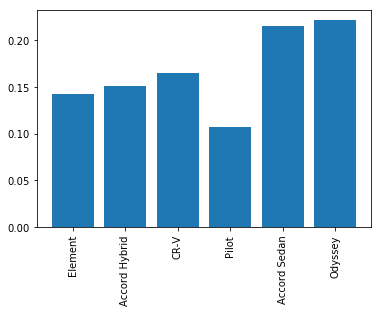

In [63]:
from matplotlib import pyplot as plt

# https://en.wikipedia.org/wiki/Analytic_hierarchy_process_%E2%80%93_car_example
escolher_melhor_carro = AHP(
    metodo='',
    precisao=3,
    alternativas=['Accord Sedan', 'Accord Hybrid', 'Pilot', 'CR-V', 'Element', 'Odyssey'],
    criterios=['cost', 'safety', 'style', 'capacity'],
    subcriterios ={
        'cost': ['Purchase Price', 'Fuel Costs', 'Maintenance Costs', 'Resale Value'],
        'capacity': ['Cargo Capacity', 'Passenger Capacity']
    },
    matrizesPreferencias={
        'criterios': [
            [1, 3, 7, 3],
            [1 / 3, 1, 9, 1],
            [1 / 7, 1 / 9, 1, 1 / 7],
            [1 / 3, 1, 7, 1]
        ],
        'cost': [
            [1, 2, 5, 3],
            [1 / 2, 1, 2, 2],
            [1 / 5, 1 / 2, 1, 1 / 2],
            [1 / 3, 1 / 2, 2, 1]
        ],
        'Purchase Price': [
            [1, 9, 9, 1, 1 / 2, 5],
            [1 / 9, 1, 1, 1 / 9, 1 / 9, 1 / 7],
            [1 / 9, 1, 1, 1 / 9, 1 / 9, 1 / 7],
            [1, 9, 9, 1, 1 / 2, 5],
            [2, 9, 9, 2, 1, 6],
            [1 / 5, 7, 7, 1 / 5, 1 / 6, 1]
        ],
        'Fuel Costs': [
            [1, 1 / 1.13, 1.41, 1.15, 1.24, 1.19],
            [1.13, 1, 1.59, 1.3, 1.4, 1.35],
            [1 / 1.41, 1 / 1.59, 1, 1 / 1.23, 1 / 1.14, 1 / 1.18],
            [1 / 1.15, 1 / 1.3, 1.23, 1, 1.08, 1.04],
            [1 / 1.24, 1 / 4, 1.14, 1 / 1.08, 1, 1 / 1.04],
            [1 / 1.19, 1 / 1.35, 1.18, 1 / 1.04, 1.04, 1]
        ],
        'Maintenance Costs': [
            [1, 1.5, 4, 4, 4, 5],
            [1 / 1.5, 1, 4, 4, 4, 5],
            [1 / 4, 1 / 4, 1, 1, 1.2, 1],
            [1 / 4, 1 / 4, 1, 1, 1, 3],
            [1 / 4, 1 / 4, 1 / 1.2, 1, 1, 2],
            [1 / 5, 1 / 5, 1, 1 / 3, 1 / 2, 1]
        ],
        'Resale Value': [
            [1, 3, 4, 1 / 2, 2, 2],
            [1 / 3, 1, 2, 1 / 5, 1, 1],
            [1 / 4, 1 / 2, 1, 1 / 6, 1 / 2, 1 / 2],
            [2, 5, 6, 1, 4, 4],
            [1 / 2, 1, 2, 1 / 4, 1, 1],
            [1 / 2, 1, 2, 1 / 4, 1, 1]
        ],
        'safety': [
            [1, 1, 5, 7, 9, 1 / 3],
            [1, 1, 5, 7, 9, 1 / 3],
            [1 / 5, 1 / 5, 1, 2, 9, 1 / 8],
            [1 / 7, 1 / 7, 1 / 2, 1, 2, 1 / 8],
            [1 / 9, 1 / 9, 1 / 9, 1 / 2, 1, 1 / 9],
            [3, 3, 8, 8, 9, 1]
        ],
        'style': [
            [1, 1, 7, 5, 9, 6],
            [1, 1, 7, 5, 9, 6],
            [1 / 7, 1 / 7, 1, 1 / 6, 3, 1 / 3],
            [1 / 5, 1 / 5, 6, 1, 7, 5],
            [1 / 9, 1 / 9, 1 / 3, 1 / 7, 1, 1 / 5],
            [1 / 6, 1 / 6, 3, 1 / 5, 5, 1]
        ],
        'capacity': [
            [1, 1 / 5],
            [5, 1]
        ],
        'Cargo Capacity': [
            [1, 1, 1 / 2, 1 / 2, 1 / 2, 1 / 3],
            [1, 1, 1 / 2, 1 / 2, 1 / 2, 1 / 3],
            [2, 2, 1, 1, 1, 1 / 2],
            [2, 2, 1, 1, 1, 1 / 2],
            [2, 2, 1, 1, 1, 1 / 2],
            [3, 3, 2, 2, 2, 1]
        ],
        'Passenger Capacity': [
            [1, 1, 1 / 2, 1, 3, 1 / 2],
            [1, 1, 1 / 2, 1, 3, 1 / 2],
            [2, 2, 1, 2, 6, 1],
            [1, 1, 1 / 2, 1, 3, 1 / 2],
            [1 / 3, 1 / 3, 1 / 6, 1 / 3, 1, 1 / 6],
            [2, 2, 1, 2, 6, 1]
        ]
    },
    log=True
)
resultado = escolher_melhor_carro.Resultado()
k = list(resultado.keys())
v = list(resultado.values())


idx=list(resultado.keys())
x = range(len(idx))

plt.bar(x, v)
plt.xticks(x, idx, rotation=90)
plt.show()


# plt.ylabel("Prioridade")
# plt.show()